In [1]:
%matplotlib inline 

# **Difference-in-differences (DID) in a training applied to a sales team**

## What is the Difference-in-Differences Model?

The Difference-in-Differences model is a statistical technique used to estimate the **causal effect** of a treatment or policy change when randomization is not possible. It compares the before-and-after changes in outcomes between a treatment group (affected by the intervention) and a control group (not affected).

## Key Idea

We assume that both groups would have followed similar trends over time if the treatment had not occurred. By comparing how much the outcome changes in each group, we can isolate the impact of the treatment.

## How it works

### Imagine we observe an outcome variable (e.g., income) for two groups across two time periods:

#### In this example we have two groups (sales team), which we applied a training in team A and team B did not receive. 

#### Table 1: Observed Data:

| Period   | Team A (Treated) | Team B (Control) |
|----------|------------------|------------------|
| Before   | 95               | 85               |
| After    | 110              | 90               |

---

#### Step-by-step:

1. **Change in A (treated group):**  
   110 - 95 = **15**

2. **Change in B (control group):**  
   90 - 85 = **5**

3. **Difference-in-Differences (DiD):**  
   (110 - 95) - (90 - 85) = 15 - 5 = **`10`**

**Interpretation:**  
The estimated causal effect of the treatment is **10 units**, assuming both groups would have followed **parallel trends** in the absence of treatment.

### This difference accounts for time trends and isolates the effect of the treatment.

## When to Use DiD

### Use DiD when you have:

#### •	Two groups: one affected by a treatment, one not.

#### •	Observations before and after the treatment.
    
#### •	A reasonable assumption that both groups would follow parallel trends without the treatment.

### Eq. 1: In regression form, we can express it this way:

### Y = β₀ + β₁·Post + β₂·Treatment + β₃·(Post × Treatment) + ε

### Where: 

- **Y**: Dependent variable (the outcome you're studying, e.g., sales, wages, scores).

- **β₀**: Intercept — the average value of **Y** for the control group **before** treatment.

- **Post**: Indicator for the post-treatment period (time dummy: 0 = before treatment, 1 = after treatment).

- **β₁ · Post**: Time effect — the change in **Y** over time for the **control group**.

- **Treatment**: Indicator for the treated group (group dummy: 1 = treated group, 0 = control group).

- **β₂ · Treatment**: Group effect — the difference in **Y** between treated and control groups **before** the treatment.

- **Post × Treatment**: Interaction term — identifies the difference-in-differences effect (associated with **β₃**).

- **β₃ · (Post × Treatment)**: DiD interaction term — this is the **key coefficient**. It estimates the **causal effect** of the treatment on the treated group.

- **ε**: Error term — captures unobserved factors affecting **Y**.

## Fig. 1: Fully labeled Difference-in-Differences (DiD) diagram modeled using the key components

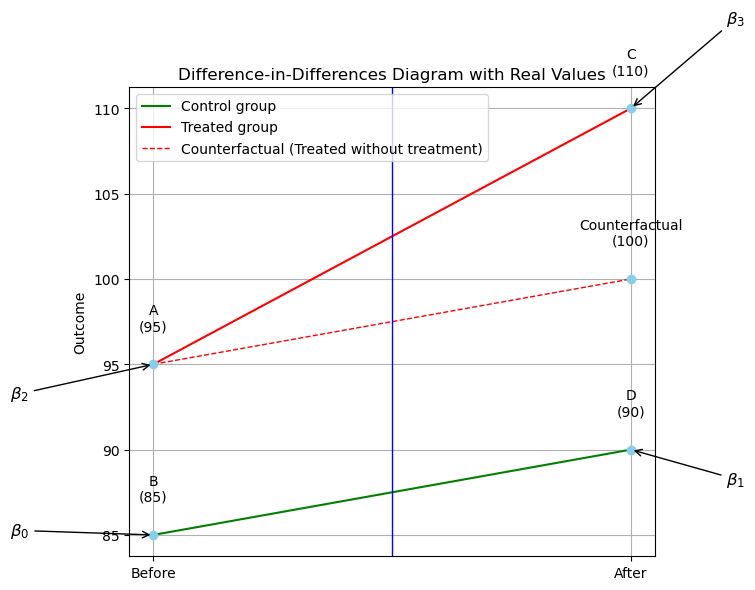

In [2]:
import matplotlib.pyplot as plt

# Valores reais
points = {
    'A': (0, 95),   # Treated group, pre-intervention
    'B': (0, 85),   # Control group, pre-intervention
    'Counterfactual': (1, 95 + (90 - 85)),  # Counterfactual para Treated no pós: A_pre + (B_post - B_pre)
    'C': (1, 110),  # Treated group, post-intervention (acima do contrafactual)
    'D': (1, 90),   # Control group, post-intervention
}

# Plot setup
fig, ax = plt.subplots(figsize=(8, 6))

# Plot linhas
ax.plot([points['B'][0], points['D'][0]], [points['B'][1], points['D'][1]], 'g-', label='Control group')
ax.plot([points['A'][0], points['C'][0]], [points['A'][1], points['C'][1]], 'r-', label='Treated group')
ax.plot([points['A'][0], points['Counterfactual'][0]], [points['A'][1], points['Counterfactual'][1]], 'r--', label='Counterfactual (Treated without treatment)', linewidth=1)

# Plot pontos
for label, (x, y) in points.items():
    ax.plot(x, y, 'o', color='skyblue')
    ax.text(x, y + 2, label + f'\n({y})', fontsize=10, ha='center')

# Anotações dos coeficientes

# β0 = baseline control pre
ax.annotate(r'$\beta_0$', xy=(0, 85), xytext=(-0.3, 85),
            arrowprops=dict(arrowstyle='->'), fontsize=12)

# β2 = baseline difference treated vs control pre
ax.annotate(r'$\beta_2$', xy=(0, 95), xytext=(-0.3, 93),
            arrowprops=dict(arrowstyle='->'), fontsize=12)

# β1 = time effect control (B to D)
ax.annotate(r'$\beta_1$', xy=(1, 90), xytext=(1.2, 88),
            arrowprops=dict(arrowstyle='->'), fontsize=12)

# β3 = treatment effect (C vs counterfactual)
ax.annotate(r'$\beta_3$', xy=points['C'], xytext=(1.2, 115),
            arrowprops=dict(arrowstyle='->'), fontsize=12)

# Linha vertical separando pré e pós
ax.axvline(x=0.5, color='blue', linestyle='-', linewidth=1)

# Configurações eixo x
ax.set_xticks([0, 1])
ax.set_xticklabels(['Before', 'After'])
ax.set_ylabel('Outcome')
ax.set_title('Difference-in-Differences Diagram with Real Values')
ax.legend(loc='upper left')
ax.grid(True)
plt.tight_layout()
plt.show()

### Visualizing the Regression Components

The diagram above shows how each term in the regression equation maps to actual data points in our example. This helps us understand how the model isolates the treatment effect.

## Practical Example:

## Imagine this scenario:

### Sales Training and Performance Boost

A company had two regional sales teams: Team A and Team B. Both teams had similar responsibilities and historically performed at comparable levels.

In Quarter 1, **the company was preparing to launch a new sales training program**.
As a pilot, **only Team A was selected to receive the training**. Team B continued their normal operations without any changes.

### • Before the training:

Team A's average sales: 95 units

Team B's average sales: 85 units

After the training was completed and a full quarter had passed, the company evaluated the results.

### • After the training:

Team A's average sales increased to 110 units

Team B's average sales rose slightly to 90 units, likely due to seasonal trends

To estimate the true impact of the training, the company used the Difference-in-Differences method.

In other words, We want to answer: 👉 **Did the training really improve sales performance?**

So, let´s do it in python:

In [3]:
import pandas as pd              # Provides data structures and data analysis tools (DataFrame, Series)
import numpy as np               # Supports numerical operations and array handling
import statsmodels.api as sm     # Contains statistical models and estimation functions
import statsmodels.formula.api as smf  # Allows specifying statistical models using formulas (like in R)
import seaborn as sns            # High-level library for statistical data visualization based on matplotlib
import matplotlib.pyplot as plt  # Core plotting library for creating graphs and charts

In [4]:
# Create synthetic dataset

# Sales values with replicates for each group
sales_A = [85, 80, 90, 100, 95, 90, 90, 95, 100, 100, 108, 100, 110, 120, 112]  # Team A (Treated)
sales_B = [78, 75, 80, 85, 82, 80, 80, 85, 90, 90, 85, 95, 90, 85, 95]      # Team B (Control)

# Repeat periods 3 times for each group
periods = ['Pre-Before'] * 5 + ['Before'] * 5 + ['After'] * 5

# Create dataframe
data = pd.DataFrame({
    'group': ['A'] * 15 + ['B'] * 15,
    'period': periods * 2,
    'sales': sales_A + sales_B
})

### Creating the Variables for DiD Regression

We now define:
- `treated`: 1 if the observation is from Team A (received training)
- `post`: 1 if the observation is from the "After" period
- `did`: interaction term (treated × post) — this captures the causal effect

In [16]:
# Add treatment dummy: 1 for group A (treated), 0 for group B (control)
data['treated'] = data['group'].apply(lambda x: 1 if x == 'A' else 0)

# Add post-treatment dummy: 1 for 'After' period, 0 otherwise
data['post'] = data['period'].apply(lambda x: 1 if x == 'After' else 0)

# DiD interaction term
data['did'] = data['treated'] * data['post']

# View result
print("Synthetic data:")
data.head(10) 


Synthetic data:


,group,period,sales,treated,post,did,period_num
0,A,Pre-Before,85,1,0,0,0
1,A,Pre-Before,80,1,0,0,0
2,A,Pre-Before,90,1,0,0,0
3,A,Pre-Before,100,1,0,0,0
4,A,Pre-Before,95,1,0,0,0
5,A,Before,90,1,0,0,1
6,A,Before,90,1,0,0,1
7,A,Before,95,1,0,0,1
8,A,Before,100,1,0,0,1
9,A,Before,100,1,0,0,1


### Fig. 2: Visualize data before modeling

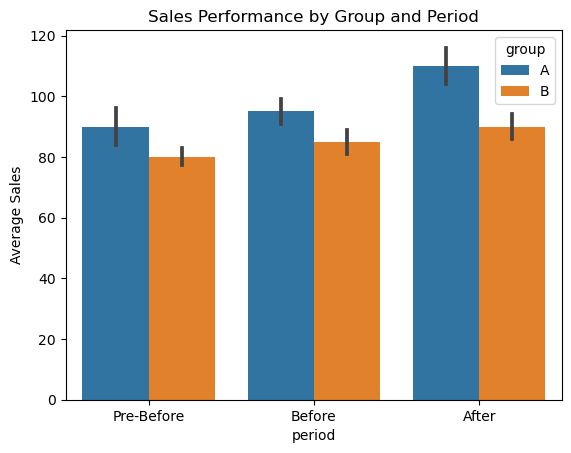

In [17]:
sns.barplot(data=data, x='period', y='sales', hue='group')
plt.title('Sales Performance by Group and Period')
plt.ylabel('Average Sales')
plt.show()

In [19]:
### Fig. 3: representing the results of training team with sales

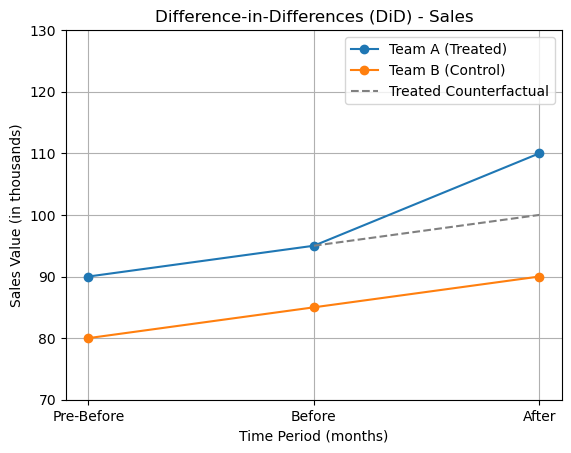

In [20]:
# Map periods to numeric x-axis values
period_mapping = {'Pre-Before': 0, 'Before': 1, 'After': 2}
data['period_num'] = data['period'].map(period_mapping)

# Calculate average sales per store and period
mean_sales = data.groupby(['group', 'period_num'])['sales'].mean().reset_index()

# Separate data for Team A and Team B
team_a = mean_sales[mean_sales['group'] == 'A'].sort_values('period_num')
team_b = mean_sales[mean_sales['group'] == 'B'].sort_values('period_num')

# Extract values for plotting
x = [0, 1, 2]
y1 = team_a['sales'].values
y2 = team_b['sales'].values

# Counterfactual based on the average in the 'Before' period projected to 'After'
# Using increment between Pre-Before and Before
increment = y1[1] - y1[0]
counterfactual_x = [1, 2]
counterfactual_y = [y1[1], y1[1] + increment]

# Plotting
plt.plot(x, y1, marker='o', label='Team A (Treated)')
plt.plot(x, y2, marker='o', label='Team B (Control)')
plt.plot(counterfactual_x, counterfactual_y, linestyle='--', color='gray', label='Treated Counterfactual')

# Titles and axis labels
plt.title("Difference-in-Differences (DiD) - Sales")
plt.xlabel("Time Period (months)")
plt.ylabel("Sales Value (in thousands)")
plt.legend()
plt.grid(True)
plt.ylim(70, 130)
plt.xticks(x, ['Pre-Before', 'Before', 'After'])

plt.show()

###  Treated Counterfactual (No Treatment Scenario) - The dashed line

This line represents the **estimated trajectory** that the treated group would have followed over time had the treatment not been applied.

It is based on the **parallel trends assumption**, which means that in the absence of treatment, the treated group would have evolved in the same way as the control group.

This projection is essential for calculating the **causal effect of the treatment** in the Difference-in-Differences (DiD) method, as it allows us to compare what actually happened with what would have happened without the intervention.

### Table 2: Testing the Parallel Trends Assumption Using Pre-Treatment Data in Difference-in-Differences (DiD)

In [21]:
import statsmodels.formula.api as smf

# Filter only pre-treatment periods
pre_treatment = data[data['period'].isin(['Pre-Before', 'Before'])].copy()

# Create a time variable (0 = Pre-Before, 1 = Before)
time_mapping = {'Pre-Before': 0, 'Before': 1}
pre_treatment['time'] = pre_treatment['period'].map(time_mapping)

# Run regression with interaction between group (treated) and time
# This tests if the treated group had a different trend before treatment
parallel_test = smf.ols('sales ~ treated * time', data=pre_treatment).fit()

# Show the regression result
print("\nParallel trends assumption test (Pre-treatment only):")
print(parallel_test.summary())

# Extract the interaction coefficient
interaction_coef = parallel_test.params.get('treated:time', None)
p_value = parallel_test.pvalues.get('treated:time', None)

if interaction_coef is not None:
    print(f"\nInteraction coefficient (treated:time) = {interaction_coef:.2f}")
    print(f"P-value = {p_value:.4f}")
    if p_value < 0.05:
        print("Parallel trends assumption likely violated (statistically significant difference).")
    else:
        print("No evidence against parallel trends assumption (not statistically significant).")


Parallel trends assumption test (Pre-treatment only):
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.552
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     6.562
Date:                Tue, 08 Jul 2025   Prob (F-statistic):            0.00423
Time:                        07:34:43   Log-Likelihood:                -60.726
No. Observations:                  20   AIC:                             129.5
Df Residuals:                      16   BIC:                             133.4
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

In [22]:
import warnings

# Ignore all warnings
warnings.filterwarnings('ignore')

### Table 3: Fit Difference-in-Differences model

In [23]:
model = smf.ols('sales ~ treated + post + did', data=data).fit()
print("\n Regression results:")
print(model.summary())


 Regression results:
                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.730
Model:                            OLS   Adj. R-squared:                  0.699
Method:                 Least Squares   F-statistic:                     23.41
Date:                Tue, 08 Jul 2025   Prob (F-statistic):           1.48e-07
Time:                        07:34:47   Log-Likelihood:                -94.254
No. Observations:                  30   AIC:                             196.5
Df Residuals:                      26   BIC:                             202.1
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     82.5000      1.9

In [24]:
# 2. Evaluate statistical significance of the DiD estimator (interaction term)
did_coef  = model.params.get('did', None)        # Estimated treatment effect
did_pval  = model.pvalues.get('did', None)       # p‑value for the treatment effect
alpha     = 0.05                                 # Significance level

if did_coef is not None:
    print(f"\nDiD coefficient (did) = {did_coef:.4f}")
    print(f"P‑value for DiD coefficient = {did_pval:.4f}")

    if did_pval < alpha:
        print("Result: The treatment effect is statistically significant at the 5% level.")
    else:
        print("Result: The treatment effect is NOT statistically significant at the 5% level.")

# 3. (Optional) Check overall model significance with the F‑test
f_pval = model.f_pvalue
print(f"\nOverall model F‑test P‑value = {f_pval:.4f}")
if f_pval < alpha:
    print("Result: The regression as a whole is statistically significant.")
else:
    print("Result: The regression as a whole is NOT statistically significant.")



DiD coefficient (did) = 10.0000
P‑value for DiD coefficient = 0.0414
Result: The treatment effect is statistically significant at the 5% level.

Overall model F‑test P‑value = 0.0000
Result: The regression as a whole is statistically significant.


In [25]:
# Extract DiD estimate
did_effect = model.params['did']
print(f"\nEstimated effect of the marketing campaign (DiD): {did_effect:.2f} units of sales")


Estimated effect of the marketing campaign (DiD): 10.00 units of sales


In [26]:
### Fig. 4: Sales Before and After the Training Team

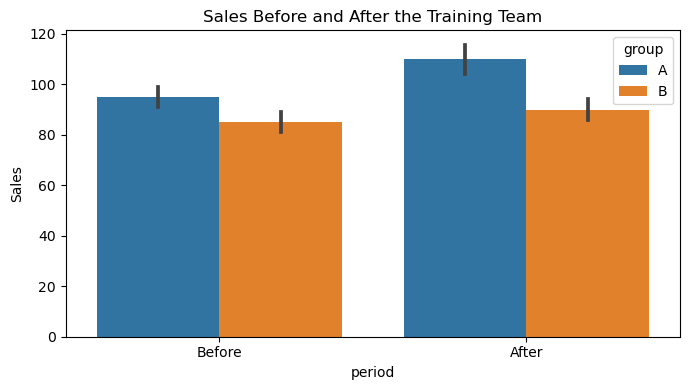

In [27]:
# Filter data to include only 'Before' and 'After' periods
filtered_data = data[data['period'].isin(['Before', 'After'])]

# Plot
plt.figure(figsize=(7, 4))
sns.barplot(data=filtered_data, x='period', y='sales', hue='group')
# hue='store': Adds color-coded bars by store, allowing comparison across groups (e.g., Group A vs Store B).
plt.title("Sales Before and After the Training Team")
plt.ylabel("Sales")
plt.tight_layout() # To avoid cutting elements
plt.show() # Displays the plot. 

### Explanations about the Error Bars in bar plot:

**sns.barplot()** Creates a bar chart using the **Seaborn library**. Note an important detail about it bars, the error bars in black.
there are no code to create it, these error bars are implicitly generated inside the sns.barplot() function. 

Seaborn’s barplot() automatically adds error bars by default! Even though they are not explicitly mentioned, the parameter ci=95 is 
set by default.

These error bars represent the **95% confidence interval of the mean**.
In other words, they indicate how much uncertainty there is around the average sales value for each period and group combination.

They help you visually assess whether differences between bars are statistically meaningful.
Case do you want to ignore it, you use the **parameter ci=None**. Like the example below:

\# No error bars
sns.barplot(data=data, x='period', y='sales', hue='store', ci=None)

If you prefer to use the **Standard Deviation of the mean**, you can use like this:

\# Use standard deviation instead of confidence interval
sns.barplot(data=data, x='period', y='sales', hue='store', ci='sd')

## Conclusion: Why DID Matters

In our sales training example, DID helped us:
1. Account for underlying growth trends
2. Isolate the true training effect
3. Provide a credible estimate despite no randomization

**Key Takeaways:**
- DID is powerful for causal inference in non-experimental settings
- The parallel trends assumption is crucial and testable
- Regression formulations make DID extensible to more complex scenarios

#### In this case, the training program caused a measurable increase in sales for the treated group (Team A).